In [3]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
TEMPERATURES = [1]
SIMULATIONS = [2, 4]
TRIAL = 10

env1 = StatelessGym.make('CartPole-v1')
env2 = StatelessGym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=False)

agent = MCTS.mcts_agent(horizon=30)

experiment1 = Experiment(env1, agent, temperatures=TEMPERATURES, simulations=SIMULATIONS, trial=TRIAL, experiment_name="Cartpole Base MCTS")

Simulation =  2 	Mean Cumulative Reward =  292.5 	Error =  38.40188797442126
Simulation =  4 	Mean Cumulative Reward =  322.2 	Error =  34.759113912756746
Temperature =  1  Results =  [292.5, 322.2]


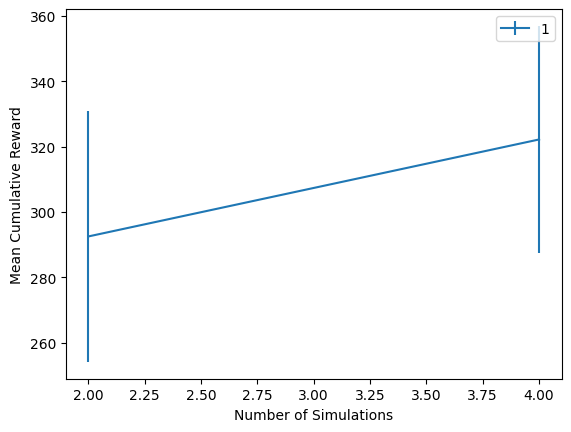

In [16]:
experiment1.run(save=True)
experiment1.show_results()

In [2]:
import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os

env = StatelessGym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
agent = MCTS.mcts_agent(horizon=-1)

rand_experiment = RandomExperiment(env, agent, simulations=[1, 16], temperature=1)
result = rand_experiment.run()
print(result)

ds = rand_experiment.create_dataset(5, "test_with_features")
print(ds)

[1, 13, 1.0, 0.9821344612135428]
[['Temperature', 'Simulations', 'Return', 'Discounted Return'], [1, 15, 0.0, 0.0], [1, 2, 0.0, 0.0], [1, 12, 1.0, 0.8761671489944468], [1, 16, 1.0, 0.803057341509771], [1, 10, 0.0, 0.0]]


    Temperature  Simulations  Return
0             1            8   308.0
1             1            1     9.0
2             1            2   222.0
3             1           15   324.0
4             1            8   173.0
..          ...          ...     ...
95            1           14   466.0
96            1           15   251.0
97            1           15   271.0
98            1            4   158.0
99            1            1     9.0

[100 rows x 3 columns]
Simulations
1       9.583333
2     262.750000
3     275.666667
4     268.833333
5     322.875000
6     324.666667
7     381.142857
8     364.333333
9     300.500000
10    406.200000
11    271.000000
12    364.400000
13    361.000000
14    440.500000
15    287.400000
16    388.000000
Name: Return, dtype: float64
<PandasArray>
[0.5149286505444373,  96.94457179233915, 105.12056570116683,
  120.3319021152191,   156.776854614631, 142.17547842953323,
 114.61155929403249, 155.16786608917025, 105.97310979677816,
  102.4779651112049, 1

<ErrorbarContainer object of 3 artists>

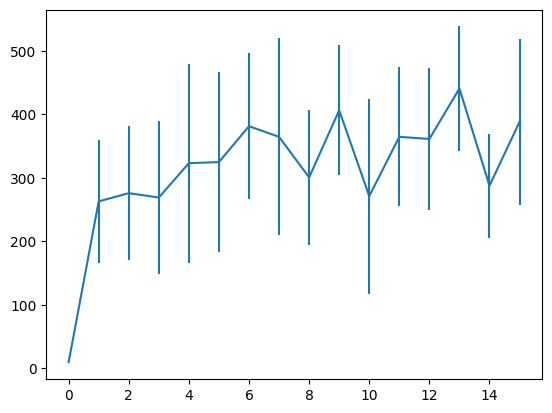

In [61]:
df = pd.read_csv('../datasets/1-100_dataset.csv')
print(df)

group_simulation = df.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

plt.errorbar(list(range(len(group_simulation))),  mean_returns, yerr=std_returns.array)

In [16]:
dataset_name = "Cluster_%d_1-16_1000-t500-Cartpole.csv"
dataset = pd.DataFrame()

for i in range(1, 11):
    dataset = dataset.append(pd.read_csv('../datasets/' + dataset_name % i), ignore_index=True)
    
print(dataset)

      Temperature  Simulations  Return
0             500            5   223.0
1             500           13   500.0
2             500           12   423.0
3             500            3    68.0
4             500            8   162.0
...           ...          ...     ...
9995          500           13   500.0
9996          500           12   500.0
9997          500           14   210.0
9998          500            5   500.0
9999          500            6   348.0

[10000 rows x 3 columns]


In [5]:
directory = "../datasets/states_s1-16_t500_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

       Temperature  Cart Position  Cart Velocity  Pole Angle  \
0              500       0.012965      -0.015232   -0.044823   
1              500      -0.034205      -0.011131   -0.035485   
2              500      -0.010103      -0.038106   -0.009900   
3              500       0.015094      -0.042249    0.044096   
4              500      -0.013956      -0.010462    0.003767   
...            ...            ...            ...         ...   
17695          500       0.042622       0.003821   -0.000735   
17696          500      -0.049073      -0.037875   -0.026292   
17697          500       0.009371       0.021144    0.027460   
17698          500       0.031102       0.041487    0.033336   
17699          500       0.012168      -0.006543    0.029416   

       Pole Angular Velocity  Simulations  Return  
0                  -0.029684            9   166.0  
1                  -0.014680           12   192.0  
2                   0.012241            9   208.0  
3                  -0.0

     Temperature  Simulations  Return
0              1           52     1.0
1              1           92     1.0
2              1           91     1.0
3              1           81     1.0
4              1           58     1.0
..           ...          ...     ...
195            1           14     0.0
196            1           49     1.0
197            1           40     1.0
198            1           51     1.0
199            1           23     1.0

[200 rows x 3 columns]


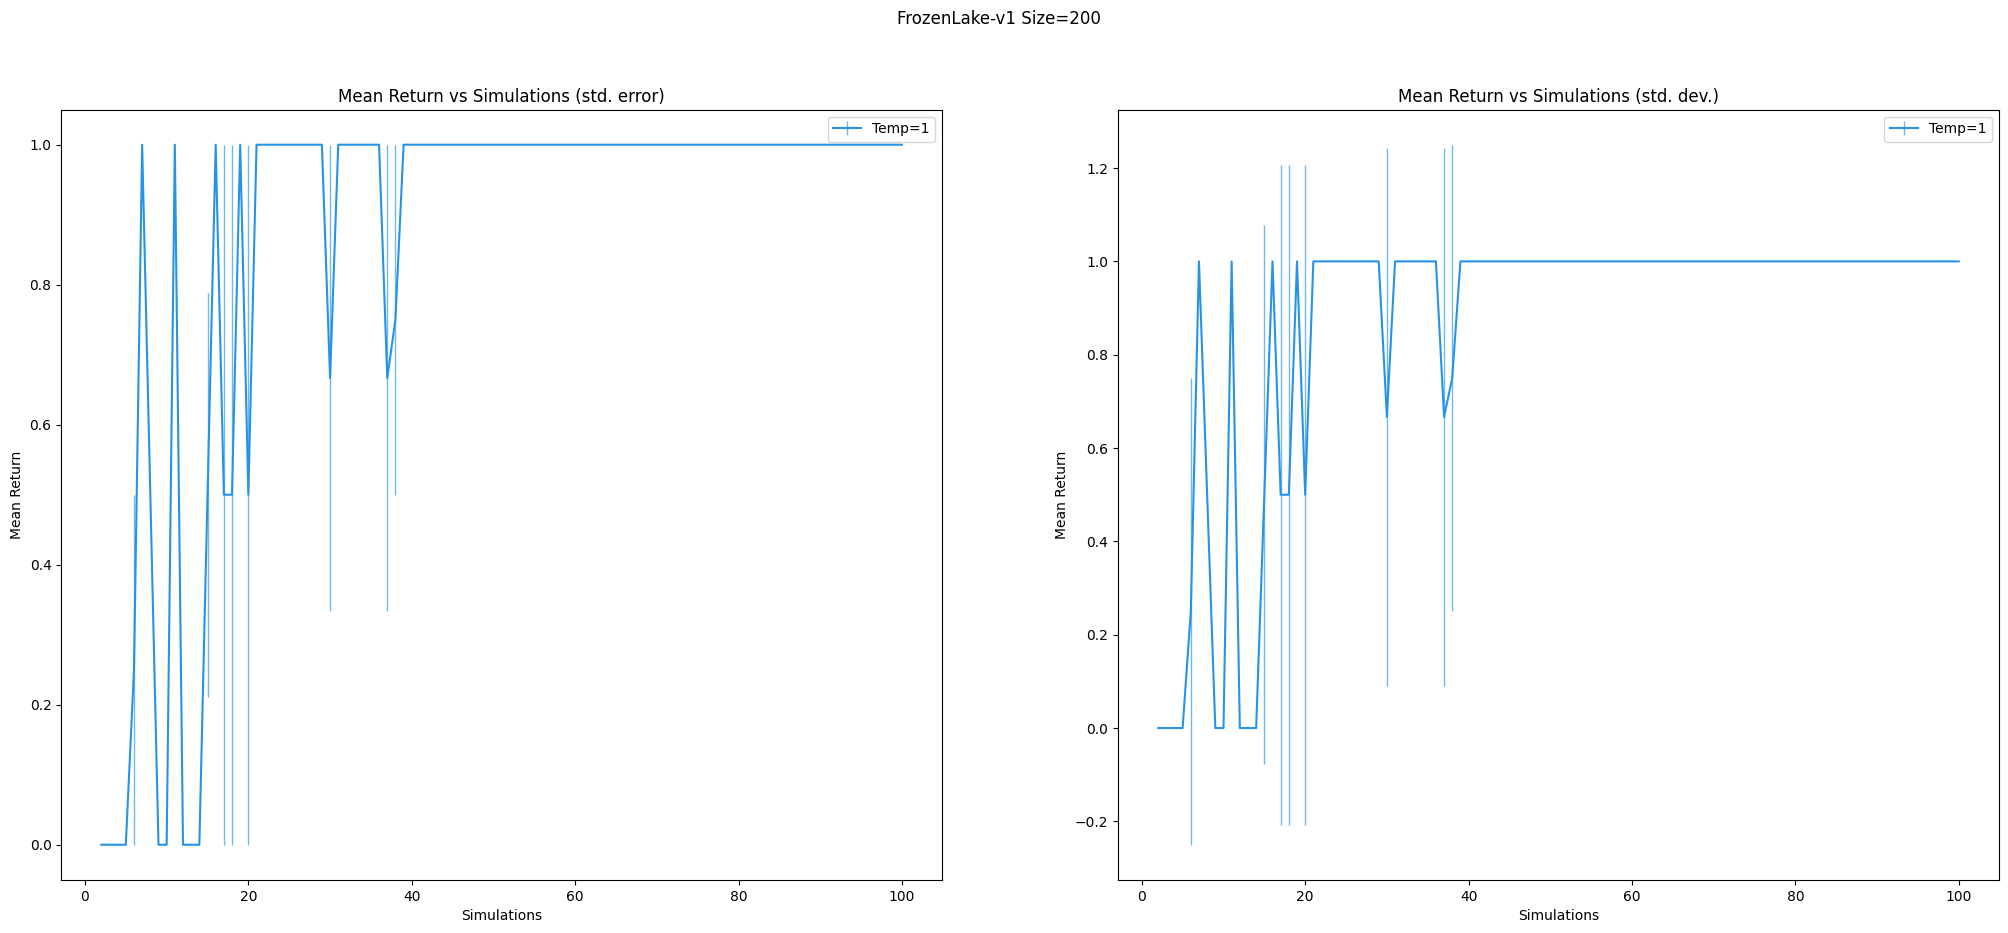

In [40]:
directory = "../datasets/200_s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
print(dataset)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)


#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)
#plt.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('FrozenLake-v1 Size=200')
fig.set_size_inches(25, 10)

ax1.set_title("Mean Return vs Simulations (std. error)")
ax2.set_title("Mean Return vs Simulations (std. dev.)")
ax1.xaxis.set_label_text("Simulations")
ax1.yaxis.set_label_text("Mean Return")
ax2.xaxis.set_label_text("Simulations")
ax2.yaxis.set_label_text("Mean Return")

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#2793e6", ecolor="#2793e6aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

directory = "../datasets/200_s1-100-t1-FrozenLake-v1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

#ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
#ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, color="#e68327aa", ecolor="#e68327aa", elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

ax1.legend()
ax2.legend()

In [41]:
directory = "../datasets/1000_s1-100_t1_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

d:\TU Delft\YEAR 2\MCTS_Time_Management\.conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


# Histogram for a specific simulation number

In [29]:
directory = "../datasets/states_s1-16_t500_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [33]:
#sim10
pole_angle = dataset[dataset["Simulations"] == 10]["Pole Angular Velocity"]

plt.scatter(pole_angle, dataset[dataset["Simulations"] == 10]["Return"], s=1, color="#2793e6", label="Temp=%d" % dataset["Temperature"].iloc[0])

KeyError: ('Pole Angular Velocity', 'Pole Angle')

count    1120.000000
mean      248.050893
std       130.725972
min        10.000000
25%       156.000000
50%       222.000000
75%       328.000000
max       500.000000
Name: Return, dtype: float64
count    1063.000000
mean      218.317968
std        75.451413
min        32.000000
25%       166.000000
50%       197.000000
75%       249.500000
max       500.000000
Name: Return, dtype: float64
count    1051.000000
mean      285.775452
std       105.543388
min        73.000000
25%       204.000000
50%       258.000000
75%       345.000000
max       500.000000
Name: Return, dtype: float64
count    1134.000000
mean      359.524691
std       120.128443
min       118.000000
25%       247.250000
50%       356.000000
75%       500.000000
max       500.000000
Name: Return, dtype: float64
count    1111.000000
mean      359.484248
std       116.398018
min       132.000000
25%       256.000000
50%       350.000000
75%       500.000000
max       500.000000
Name: Return, dtype: float64
count    1100.0

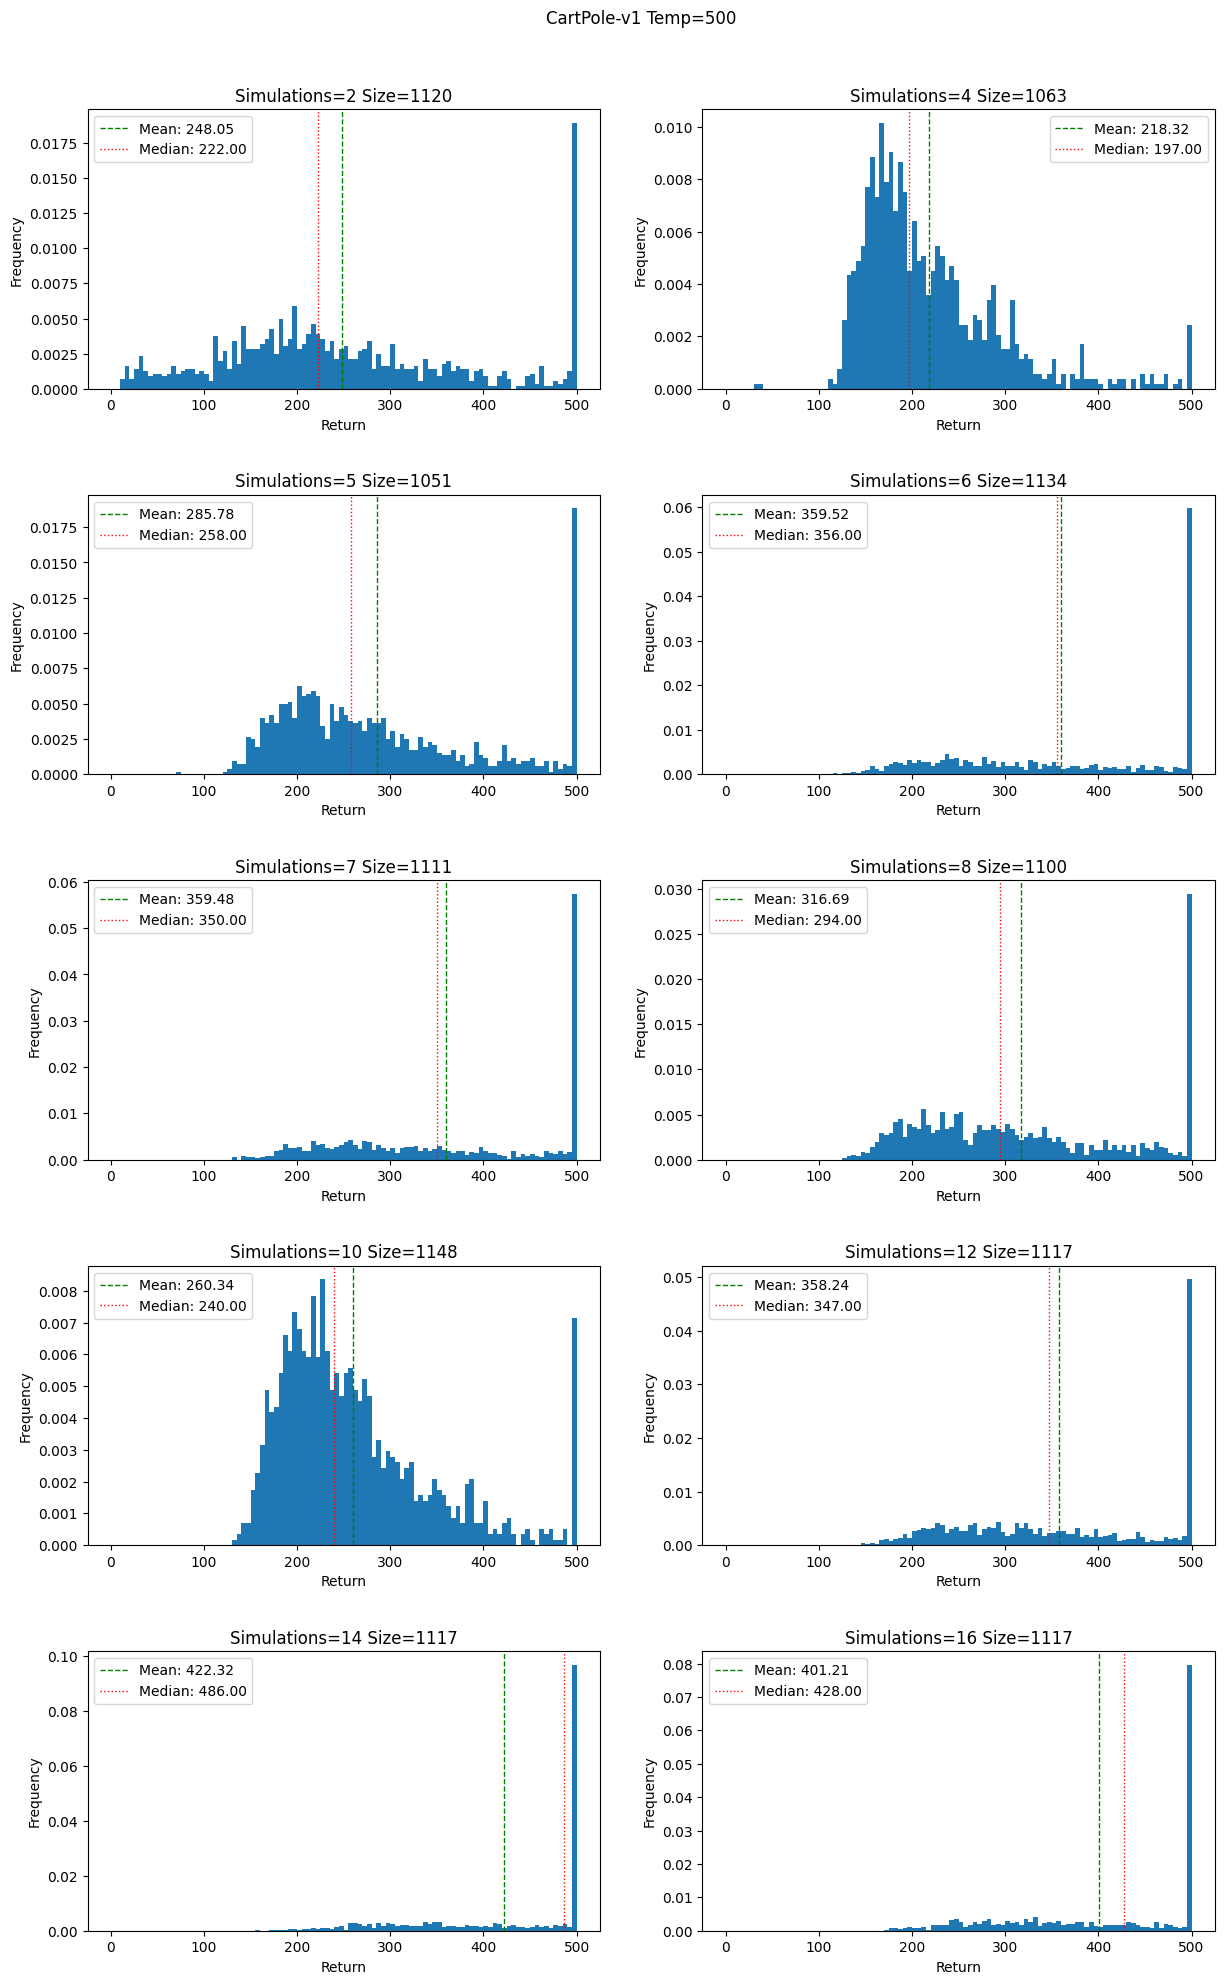

In [30]:
sims = [2, 4, 5, 6, 7, 8, 10, 12, 14, 16]
bins = 100
fig, axes = plt.subplots(len(sims) // 2 + len(sims) % 2, 2)
fig.suptitle('CartPole-v1 Temp=500')
fig.set_size_inches(12, 4 * (len(sims) // 2))
fig.tight_layout()
fig.subplots_adjust(wspace=0.2,
                    hspace=0.38,
                    top=0.93)

for i in range(len(sims)):
    print(group_simulation["Return"].get_group(sims[i]).describe())
    current_ax = axes[i // 2][i % 2]
    return_group = group_simulation["Return"].get_group(sims[i])
    current_ax.hist(return_group, bins=bins, density=True, range=[0, 500])
    current_ax.axvline(return_group.mean(), color="green", linestyle='dashed', linewidth=1, label = "Mean: %.2f" % return_group.mean())
    current_ax.axvline(return_group.median(), color="red", linestyle='dotted', linewidth=1, label = "Median: %.2f" % return_group.median())
    
    current_ax.set_title("Simulations=%d Size=%d" % (sims[i], len(return_group)))
    current_ax.xaxis.set_label_text("Return")
    current_ax.yaxis.set_label_text("Frequency")
    current_ax.legend()


In [66]:
print(list(group_simulation.indices.keys()))
print(mean_returns)
print(group_simulation["Return"].count())
print(error_returns.array)

[2, 5, 6, 8, 9, 10, 11, 13, 15, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 45, 46, 49, 52, 54, 55, 56, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 84, 86, 93, 98, 99]
Simulations
2     156.500000
5     229.500000
6     500.000000
8     248.000000
9     319.250000
10    280.500000
11    285.000000
13    426.000000
15    390.000000
18    500.000000
19    245.000000
22    171.000000
23    352.000000
24    253.000000
25    352.666667
26    500.000000
27    500.000000
28    339.000000
29    364.000000
30    500.000000
31    500.000000
32    392.500000
33    288.000000
36    261.000000
37    500.000000
38    327.000000
39    376.333333
40    421.000000
41    349.000000
43    243.000000
45    227.000000
46    305.000000
49    308.000000
52    329.000000
54    500.000000
55    410.666667
56    410.250000
61    425.000000
62    500.000000
63    460.000000
65    500.000000
68    495.500000
69    500.000000
70    448.000000
71    50

# Regression Algorithms

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

In [48]:
directory = "../datasets/states_s1-16_t500_Cartpole/"
#directory = "../datasets/10k/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

In [60]:
features = ['Simulations', 'Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Angular Velocity']
#features = ['Simulations']

X = dataset[features].values.reshape(-1, len(features))
y = dataset['Return'].values

from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data (compute the mean and standard deviation)
scaler.fit(X)

# Transform your data by applying the scaler
X = scaler.transform(X)

In [62]:
print(X)
print(y.shape)

[[ 0.11361301  0.43966689 -0.52447157 -1.53953893 -1.02283619]
 [ 0.7638448  -1.19589176 -0.38321476 -1.21655237 -0.50136113]
 [ 0.11361301 -0.36019066 -1.31228491 -0.33156124  0.43425113]
 ...
 [ 0.98058873  0.3150676   0.72834988  0.9607523   1.55631048]
 [ 0.7638448   1.06856152  1.42899183  1.16400405 -0.351837  ]
 [ 0.54710087  0.41203623 -0.22522103  1.02841687 -0.45982287]]
(17700,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
models = {
    'LinearRegression': LinearRegression(),
    #'Ridge': Ridge(alpha=1.0),
    #'Lasso': Lasso(alpha=1.0),
    #'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'SVR': SVR(kernel='rbf'),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(32, 32), max_iter=500)
}


predictions = {}  # Dictionary to store predictions

# Example usage: training and predicting with each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    
    # Perform further operations with the predictions

In [65]:
metrics = {
    'Mean Squared Error': mean_squared_error,
    #'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score,
    'Explained Variance Score': explained_variance_score,
    #'Median Absolute Error': median_absolute_error,
    #'Mean Squared Log Error': mean_squared_log_error,
    #'Max Error': max_error,
    #'Mean Poisson Deviance': mean_poisson_deviance,
    #'Mean Gamma Deviance': mean_gamma_deviance,
    #'Mean Tweedie Deviance': mean_tweedie_deviance
}

# Example usage: iterating over the predictions dictionary and calculating metrics
for model_name, y_pred in predictions.items():
    print(f"Model: {model_name}")
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f"{metric_name}: {metric_value}")
    print()


Model: LinearRegression
Mean Squared Error: 14506.827523476357
R^2 Score: 0.27738000407642494
Explained Variance Score: 0.27757611263084714

Model: SVR
Mean Squared Error: 15275.977371314117
R^2 Score: 0.23906679886255677
Explained Variance Score: 0.2519471440376507

Model: DecisionTreeRegressor
Mean Squared Error: 21686.087288135594
R^2 Score: -0.08023620480706928
Explained Variance Score: -0.080111327870241

Model: RandomForestRegressor
Mean Squared Error: 11377.20458940678
R^2 Score: 0.43327405521888596
Explained Variance Score: 0.4333269873275012

Model: GradientBoostingRegressor
Mean Squared Error: 10531.190886378974
R^2 Score: 0.47541603406601174
Explained Variance Score: 0.4754430044990501



In [41]:
directory = "../datasets/states_s1-16_t500_Cartpole/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()
error_returns = std_returns / (group_simulation["Return"].count() ** 0.5)

ax1.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=error_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])
ax2.errorbar(list(group_simulation.indices.keys()),  mean_returns, yerr=std_returns.array, elinewidth=1, label="Temp=%d" % dataset["Temperature"].iloc[0])

d:\TU Delft\YEAR 2\MCTS_Time_Management\.conda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


# Histogram for a specific simulation number

In [63]:
directory = "../datasets/10k/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)

group_simulation = dataset.groupby("Simulations")
mean_returns = group_simulation["Return"].mean()
std_returns = group_simulation["Return"].std()

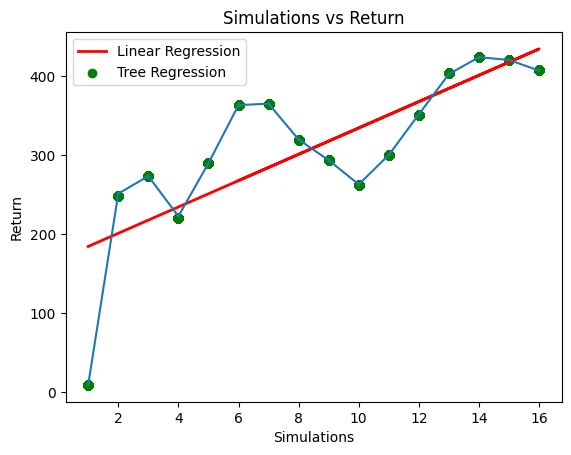

In [166]:
plt.errorbar(list(range(1, len(group_simulation) + 1)),  mean_returns, yerr=error_returns.array)
plt.plot(X_test, linear_predictions, linewidth=2, color='red', label='Linear Regression')
plt.scatter(X_test, tree_predictions, color='green', label='Tree Regression')
#plt.scatter(X_test, forest_predictions, color='red', label='Forest Regression')


plt.xlabel('Simulations')
plt.ylabel('Return')
plt.title('Simulations vs Return')
plt.legend()
plt.show()

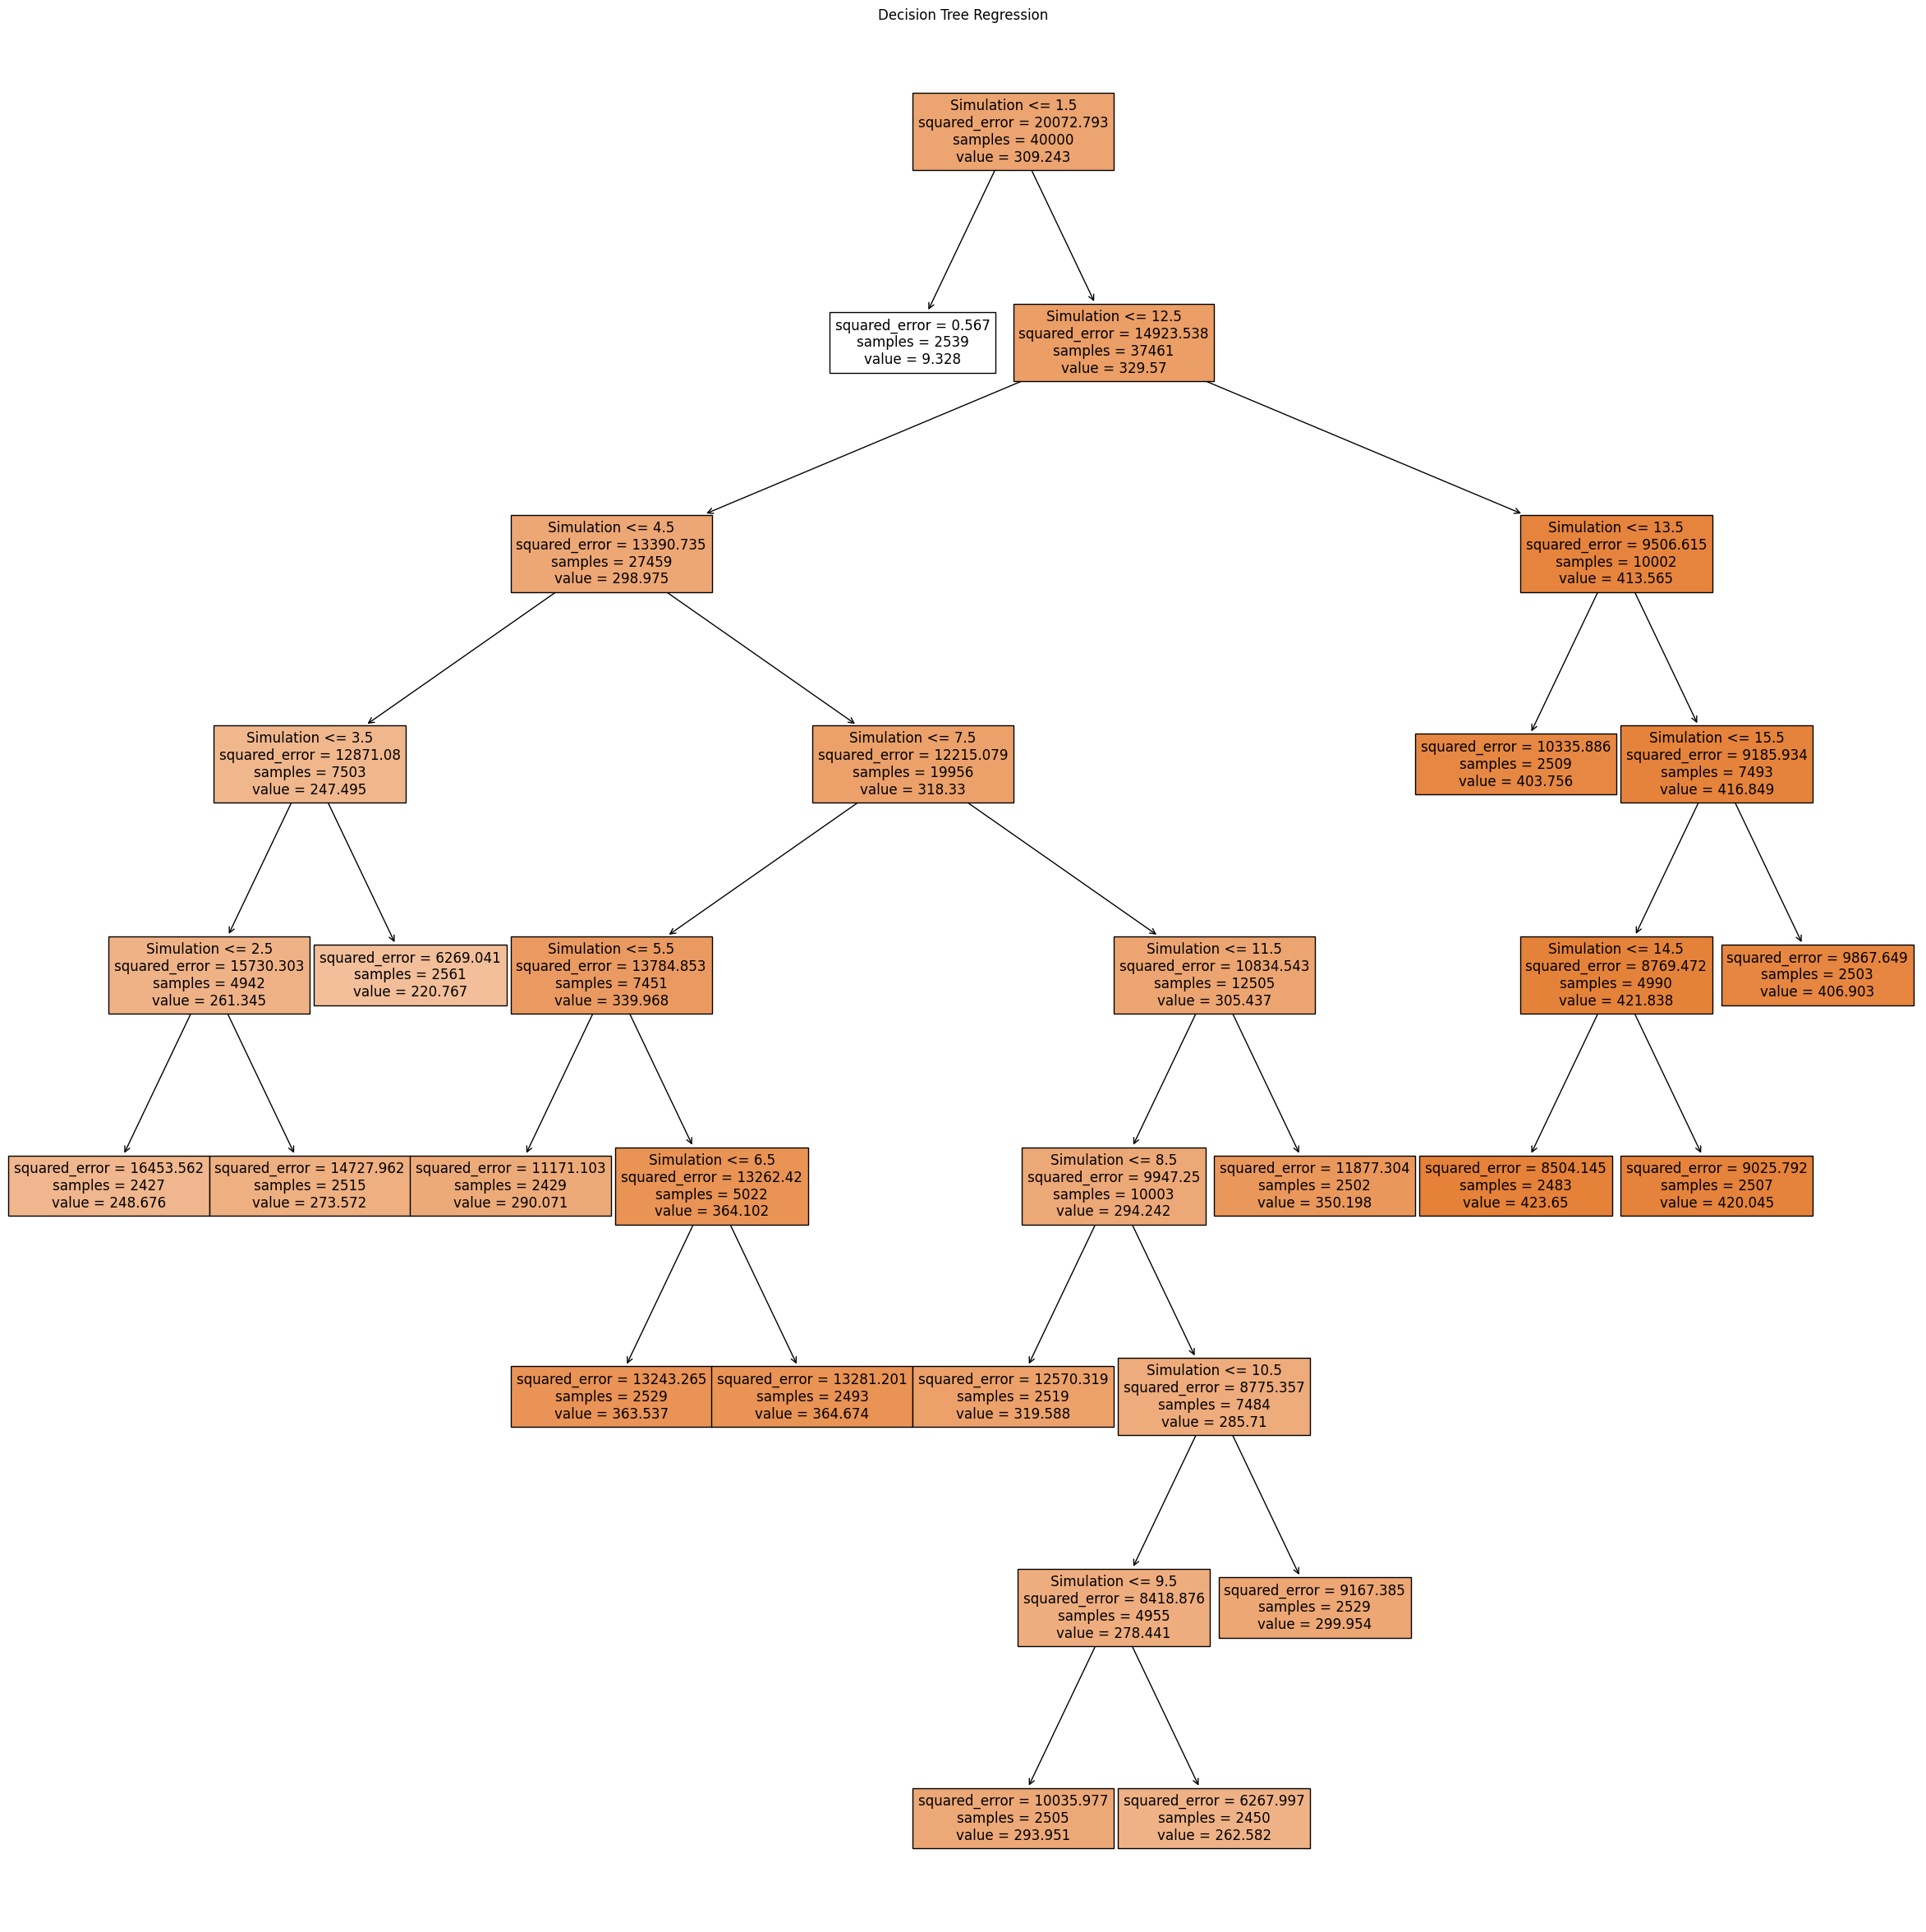

In [134]:
plt.figure(figsize=(30, 30))
plot_tree(tree_model, feature_names=['Simulation'], filled=True)
plt.title('Decision Tree Regression')
plt.show()
